# Creating dataset from json file

## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ndjson

In [2]:
with open('./Video_Games_5.json') as f:
    data = ndjson.load(f)

In [3]:
reviews = pd.DataFrame(data)

In [4]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [5]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

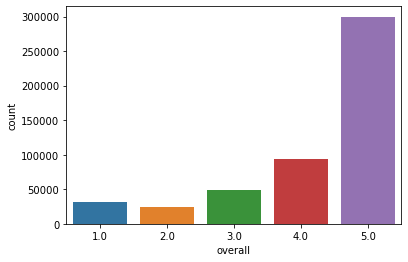

In [6]:
sns.countplot(data = reviews, x='overall')

In [7]:
len(reviews['asin'].value_counts(dropna=False))


17408

## Undersampling of Reviews


Taking a random sample of the reviews by selecting 150 reviews with rating 1, 50-50-50 reviews with ratings 2, 3, 4, and 100 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.



In [13]:
one_150 = reviews[reviews['overall']==1.0].sample(n=150)
two_50 = reviews[reviews['overall']==2.0].sample(n=50)
three_50 = reviews[reviews['overall']==3.0].sample(n=50)
four_50 = reviews[reviews['overall']==4.0].sample(n=50)
five_100 = reviews[reviews['overall']==5.0].sample(n=100)

In [14]:
undersampled_reviews = pd.concat([one_150, two_50, three_50, four_50, five_100], axis=0)

In [15]:
undersampled_reviews['overall'].value_counts(dropna=False)

1.0    150
5.0    100
2.0     50
3.0     50
4.0     50
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

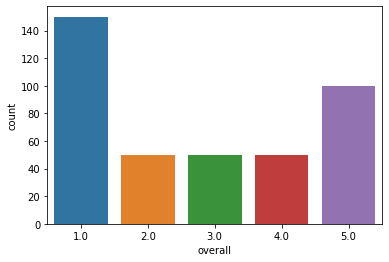

In [16]:
sns.countplot(data=undersampled_reviews, x='overall')

## Writing Corpora

In [18]:
undersampled_reviews.to_csv("./small_corpus.csv", index=False)

# Sentiment Scoring Using SentiWordNet

## Importing libraries


In [19]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [20]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [21]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace(""," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [22]:
reviews = pd.read_csv("./small_corpus.csv")

In [23]:
reviews.shape

(400, 12)

In [24]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"01 24, 2016",A2KF8OC6R396P4,B0045ZIEPY,Benjamin Cohen,This game is really boring to me. I also can't remember what special moves I have in which slots or them in general. Really confusing. Get another RPG that doesn't require you to have Autism to remember everything.,Insane amount of text,1453593600,NaN,{'Platform:': ' PlayStation 3'},NaN
1,1.0,False,"10 15, 2007",A1GDCXI6V6T81M,B000PS2XES,D. M. Crosgrove,"I loved HL2. I loved HL2 E1. This episode, however, is both uninspired and frustrating. Too many missions which are thinly disguised timed missions. (You know, wave after wave of mobs are thrown at you and if one makes it past you through one of the areas you are guarding have failed and thus get to restart.) The plot that is being advanced is, well, about as original as as an MST3K movie. Your new weapon is a mine you must fire with the grav gun so it sticks to a mob, and then switch to another wep and hit the mine so it explodes.\n\nBTW, if the mine gets hit by enemy fire even when it is in your grasp, it crumbles. Also, if you miss and land it near the mob, the mine merely shatters.\n\nWow! What a great innovation!\n\nAnd, this is the wep you get for one of the timed missions--the last boss mission.\n\nSadly, also, this entire episode only takes about 5-6 hours to finish if you explore a lot. You are not getting a lot of content for your dollar.\n\nThis is the Star Wars Galaxies of the HL franchise...",This is the Star Wars Galaxies of the HL franchise...,1192406400,15.0,{'Platform:': ' PC'},NaN
2,1.0,False,"03 28, 2013",A1507URMTDQMM3,B006UD9CY6,Todd Wood jr.,Often if it sounds to good to be true it is Xploder is the example it's nothing more then a scam the saves seem to fail to resign which is xploders one and only job and the cheat saves are all player made and I myself could make better cheat saves then the ones availible.,Xploder=scam,1364428800,14.0,NaN,NaN
3,1.0,True,"01 9, 2018",A2E4SOBXHATYC7,B01E8RS598,Alex,"Plastic build, minimal adjustments, low quality software, painful to wear for an extended period of time, not recomending these. I would honestly rather spend the extra $$$ and get a logitech product.",painful to wear for an extended period of time,1515456000,2.0,{'Color:': ' Spirit Wolf USB White'},NaN
4,1.0,False,"10 12, 2010",A132GQLZPBYBGH,B000TI836G,Danny,I thought this game was better than COD but it turns out COD BLACK OPS FTW!,NOT A GOOD GAME TO BUY!,1286841600,5.0,{'Format:': ' Video Game'},NaN


In [25]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [26]:
reviews.shape

(400, 12)

In [27]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [29]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
135,Key didn't work.,0.000000
294,"They took a lot of liberty with this sequel.. It still feels like Bravely Default, but it isn't as good as the original. Voice acting seems off, personalities have changed. Storyline is kinda meh. The choice system on sub quests in particular is infuriating. Battles still work the same and there are a lot of good quality of life changes. Bossfights are a little more bland than in Bravely Default. Even on hard mode, boss's hp is too low to not completely obliterate them even if you fight them in the suggested level range. There are some really overpowered (passive) abilities you have access to early that just make the early/mid part of the story a steamroll. Aside from these nitpicks, the game is fine. If you liked Bravely Default, you'll experience undertones of disappointment while playing this game, but it is still worth picking up just to play more Bravely Default.",1.295732


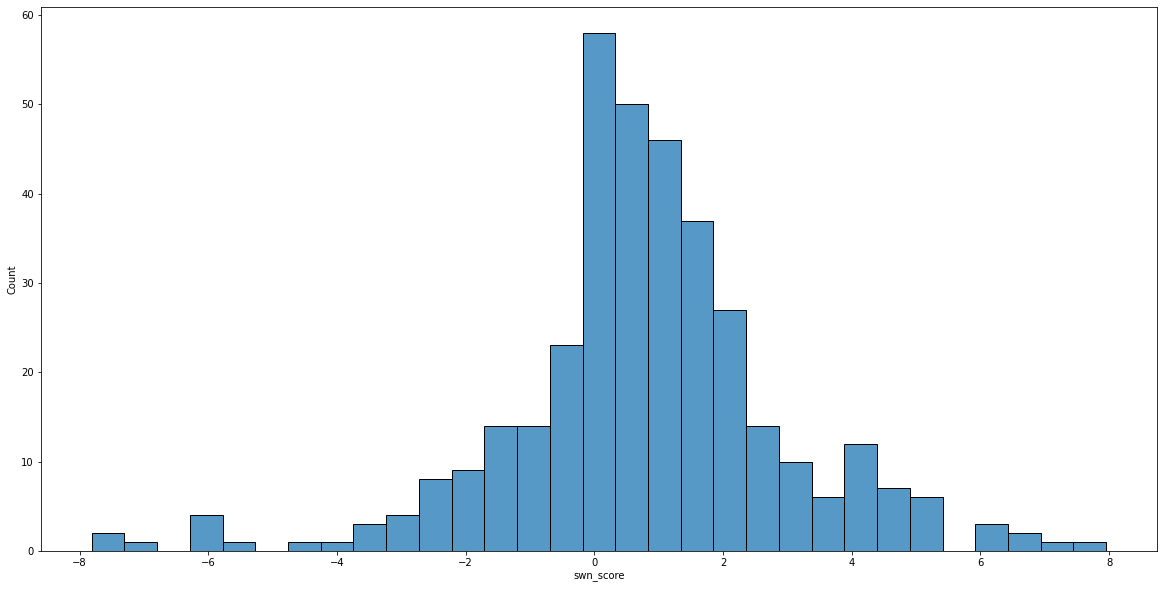

In [30]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [31]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [32]:
reviews['swn_sentiment'].value_counts(dropna=False)

positive    180
negative    165
neutral      55
Name: swn_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

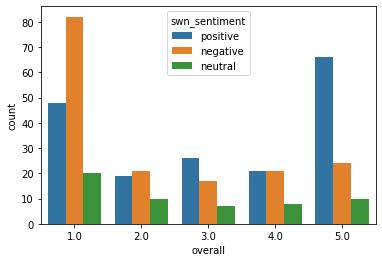

In [33]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<AxesSubplot:xlabel='swn_sentiment', ylabel='overall'>

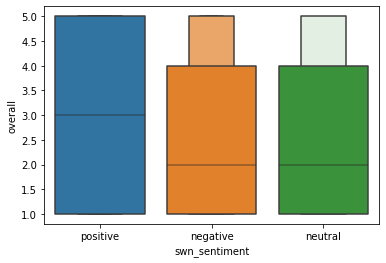

In [34]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)


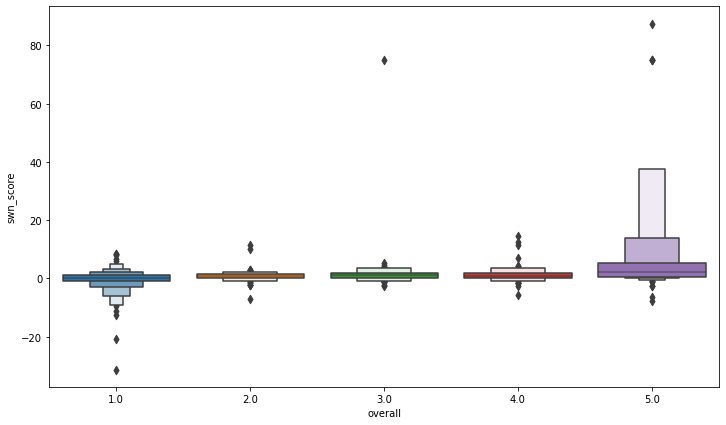

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [36]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [37]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [38]:
len(y_swn_pred), len(y_true)

(400, 400)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

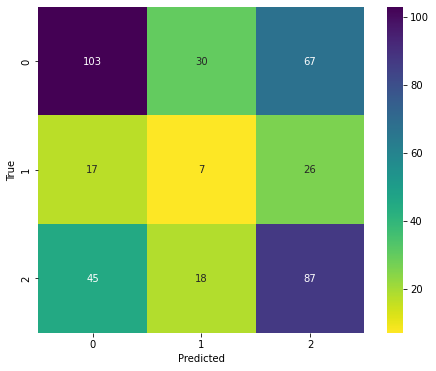

In [41]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

# Performance assessment

## Positive Sentiment Prediction Assessment

In [45]:
tp, tn, fp, fn = 87, 103+30+7+17, 26+67, 18+45

In [46]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [47]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.58
precission: 0.48333333333333334
f1 score: 0.5272727272727272


## Negative Sentiment Prediction Assessment

In [49]:
tp, tn, fp, fn = 103, 7+26+18+87, 30+67, 17+45

In [50]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.58
precission: 0.48333333333333334
f1 score: 0.5272727272727272
